In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def plot_seed_variation(logdir = 'logs', filter_small = False):
    logfiles = os.listdir(logdir)
    all_performance_records = {}
    for logfile in logfiles:
        if os.path.exists(os.path.join(logdir, logfile,'final/performance_records.csv')):
            all_performance_records[logfile] = pd.read_csv(os.path.join(logdir, logfile,'final/performance_records.csv'))
    for key in all_performance_records.keys():
        seeds = len(all_performance_records[key])
        if seeds <= 20 and filter_small:
            continue
        plt.figure(figsize = (10, 5))
        plt.hist(all_performance_records[key]['Validation Loss'], bins = 10, alpha = 0.5)
        plt.xlabel('Telescope Loss')
        plt.ylabel('Frequency')
        plt.title(f'{key} Telescope Loss Distribution over {seeds} seeds')
        
        best_loss = all_performance_records[key]['Validation Loss'].min()
        avg_loss = all_performance_records[key]['Validation Loss'].mean()
        std_loss = all_performance_records[key]['Validation Loss'].std()
    
        plt.figtext(0.15, 0.8, f'Best Model Loss: {best_loss:.4f}', fontsize=12, ha='left')
        plt.figtext(0.15, 0.75, f'Average Loss: {avg_loss:.4f}', fontsize=12, ha='left')
        plt.figtext(0.15, 0.7, f'Standard Deviation: {std_loss:.4f}', fontsize=12, ha='left')
        plt.figtext(0.15, 0.65, f'Best seed: {all_performance_records[key][all_performance_records[key]["Validation Loss"] == best_loss]["Seed"].values[0]}', fontsize=12, ha='left')
    
        plt.show()


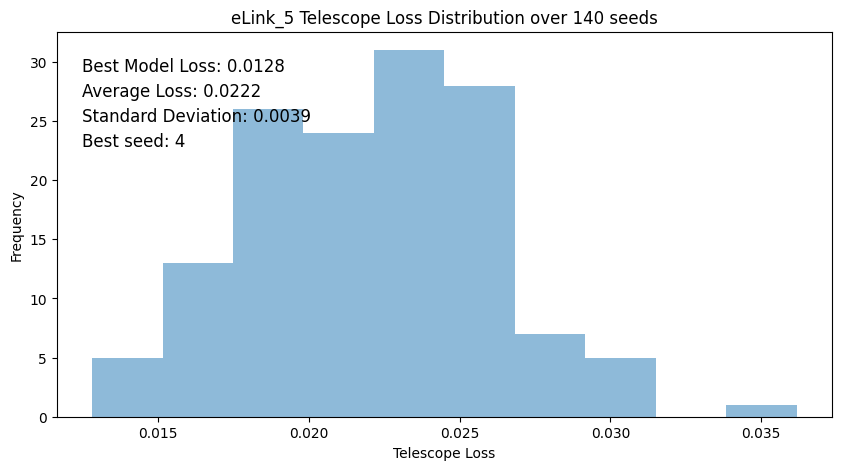

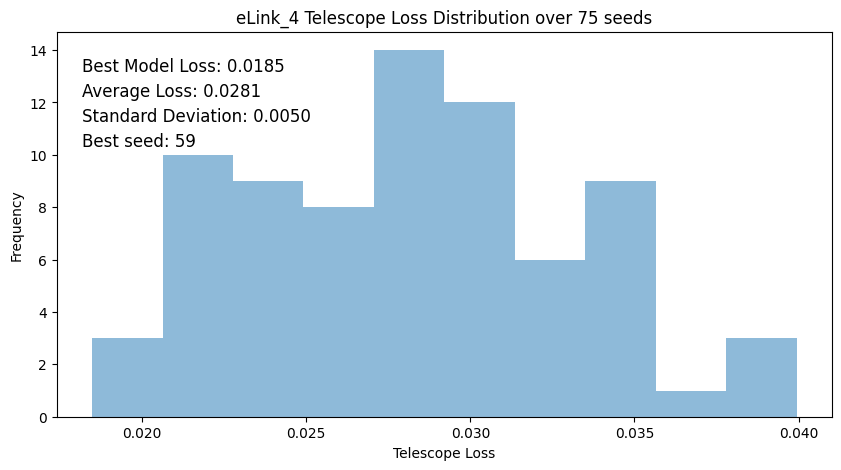

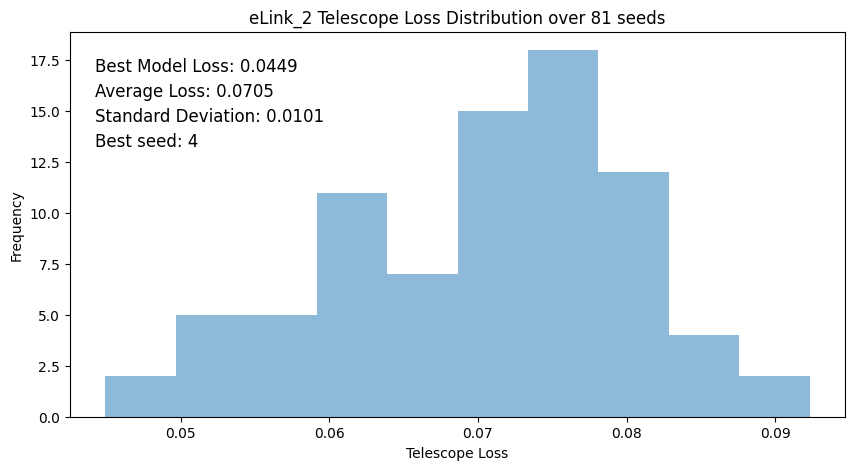

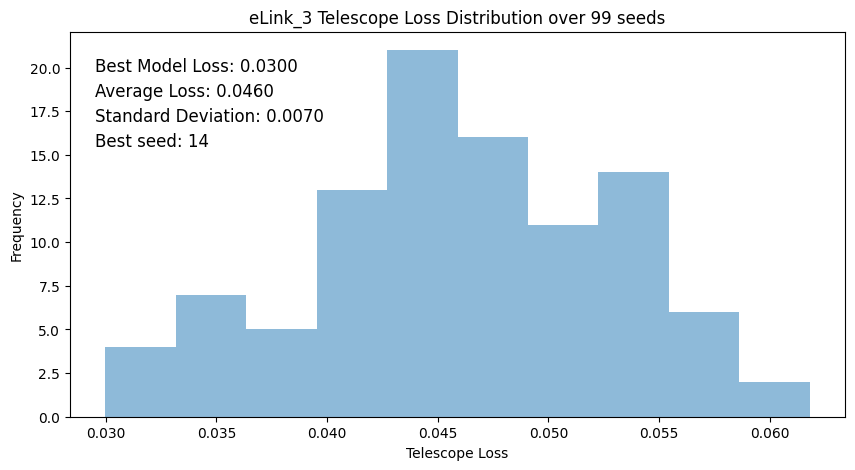

In [3]:
plot_seed_variation('logs', filter_small=True)

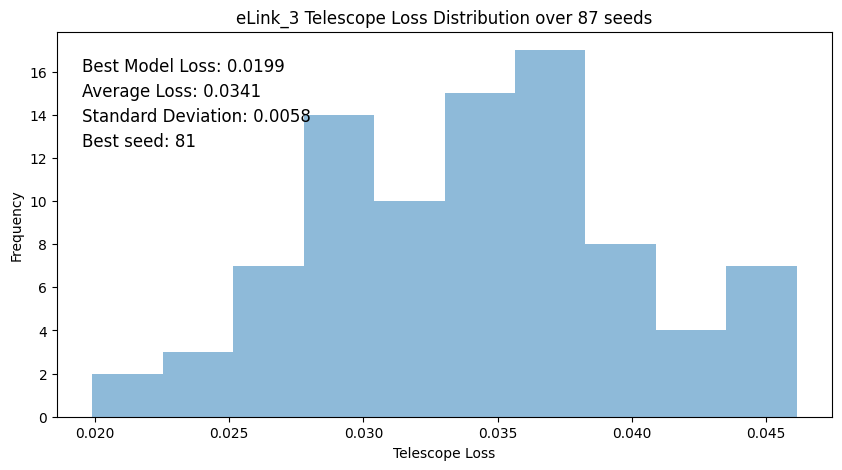

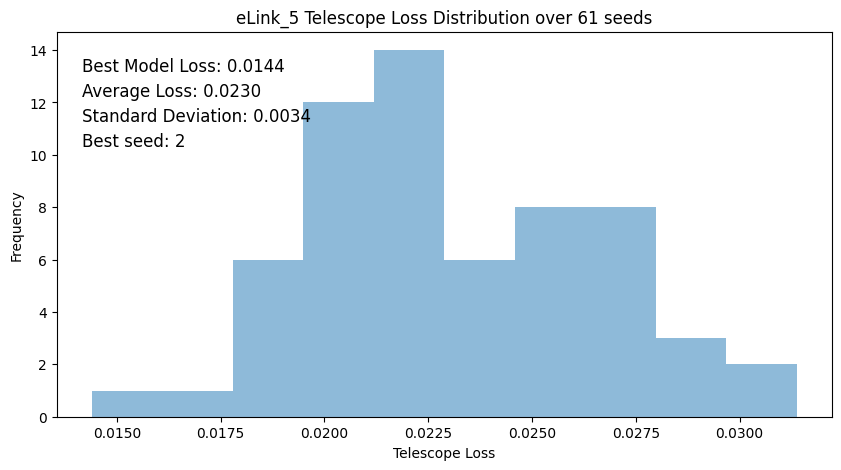

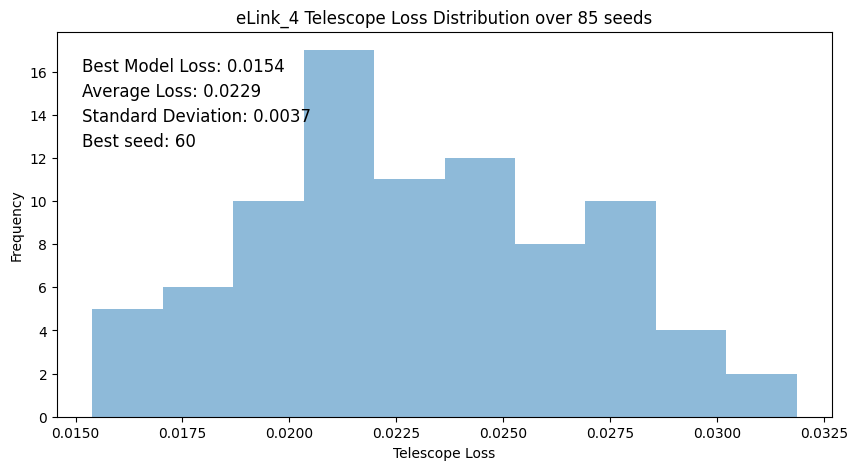

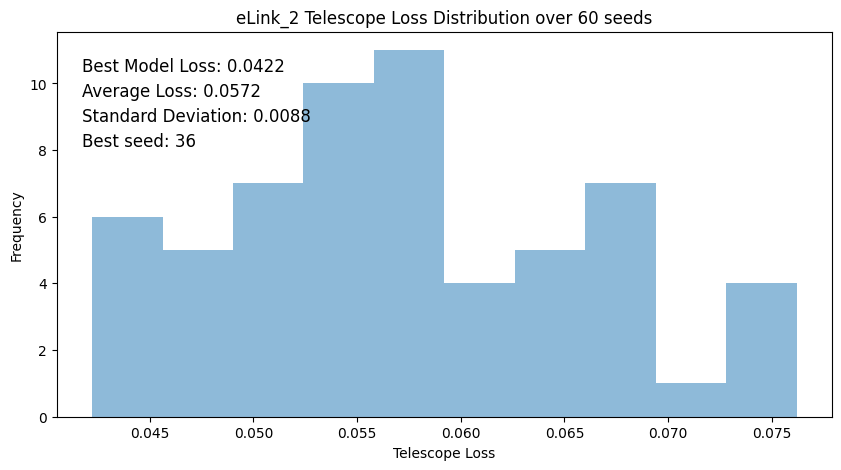

In [4]:
plot_seed_variation('orthogon_reg_as_hparam_logs', filter_small=True)

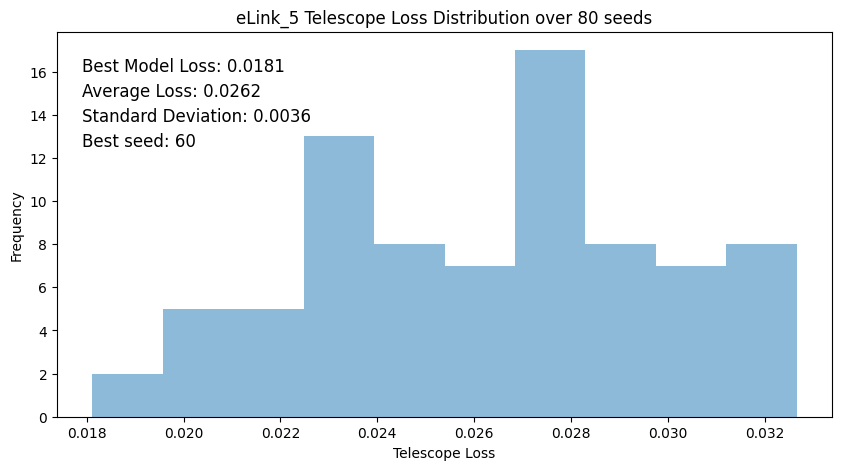

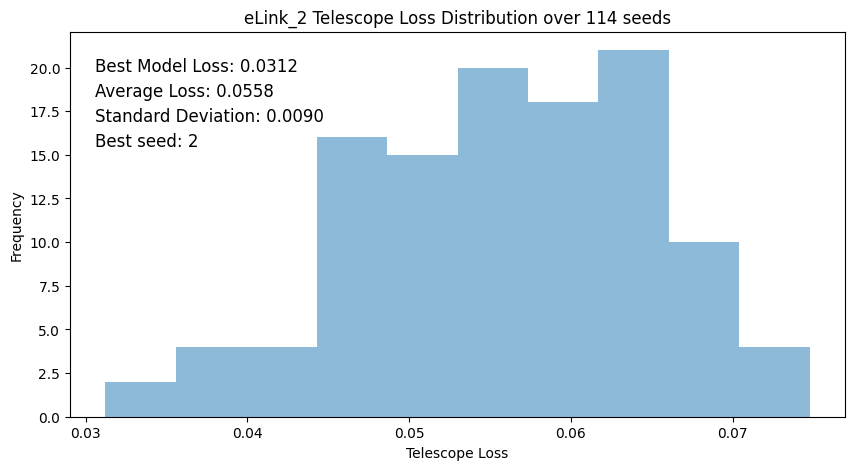

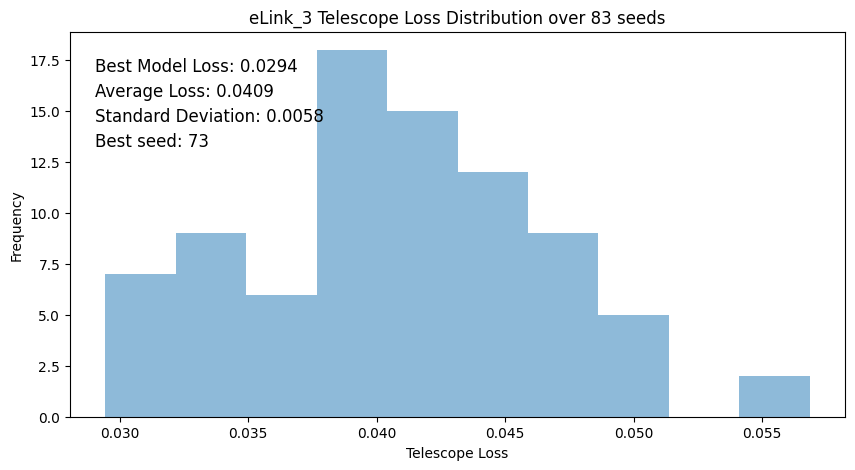

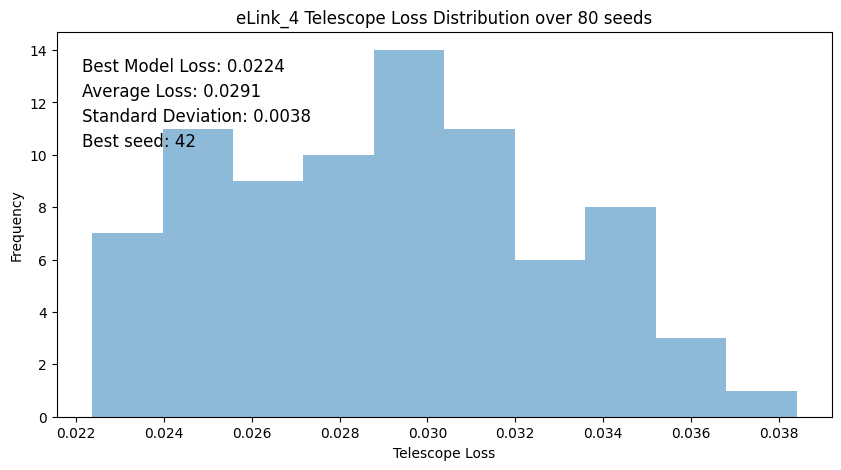

In [5]:
plot_seed_variation('orthogon_reg_logs', filter_small=True)